# Blood pressure 

____

## Table of Contents
- [Importing libraries](#Importing-libraries)
- [Load data](#Load-data)
- [Data Cleaning and Preparation](#Data-Cleaning-and-Preparation)
- [Data Exploration & Visualization](#Data-Exploration-&-Visualization)
- [Machine Learning for Diastolic Blood Pressure](#Machine-Learning-for-Diastolic-Blood-Pressure)

____

## Importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

____

## Load data

data source: https://www.kaggle.com/christofel04/cardiovascular-study-dataset-predict-heart-disea

In [2]:
df = pd.read_csv('../data/cardio_data.csv')

### Check dimensions 

In [3]:
df.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0.0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0.0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0.0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0.0


In [4]:
df.shape

(4238, 17)

____

## Data Cleaning and Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   object 
 4   is_smoking       4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       3390 non-null   float64
dtypes: float64(10)

### Check for uniqueness 

In [6]:
df['id'].nunique()

4238

### Drop some columns 

'BPMeds', 'prevalentHyp', 'sysBP' are clear indicatorsof the diastolic blood pressure

In [7]:
df.drop(['id', 'TenYearCHD', 'BPMeds', 'prevalentHyp', 'sysBP'], axis=1, inplace=True)

In [8]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
0,64,2.0,F,YES,3.0,0,0,221.0,85.0,NaN,90.0,80.0
1,36,4.0,M,NO,0.0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1.0,F,YES,10.0,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1.0,M,YES,20.0,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1.0,F,YES,30.0,0,0,241.0,85.0,26.42,70.0,77.0


### Check for nulls

In [9]:
df.isnull().sum()

age                  0
education          105
sex                  0
is_smoking           0
cigsPerDay          29
prevalentStroke      0
diabetes             0
totChol             50
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(3707, 12)

____

## Data Exploration & Visualization

### Summary

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3707.0,49.608309,8.577844,32.00,42.00,49.00,56.000,70.0
education,3707.0,1.978149,1.023368,1.00,1.00,2.00,3.000,4.0
cigsPerDay,3707.0,9.010790,11.925085,0.00,0.00,0.00,20.000,70.0
prevalentStroke,3707.0,0.005935,0.076819,0.00,0.00,0.00,0.000,1.0
diabetes,3707.0,0.027246,0.162821,0.00,0.00,0.00,0.000,1.0
totChol,3707.0,236.913137,44.225310,113.00,206.00,234.00,263.500,600.0
diaBP,3707.0,82.927030,12.008306,48.00,75.00,82.00,90.000,142.5
BMI,3707.0,25.780971,4.068447,15.54,23.07,25.38,28.025,56.8
heartRate,3707.0,75.735366,11.950783,44.00,68.00,75.00,82.000,143.0
glucose,3707.0,81.863501,23.823515,40.00,71.00,78.00,87.000,394.0


### Correlation

In [13]:
df_corr = df.corr(method='spearman')

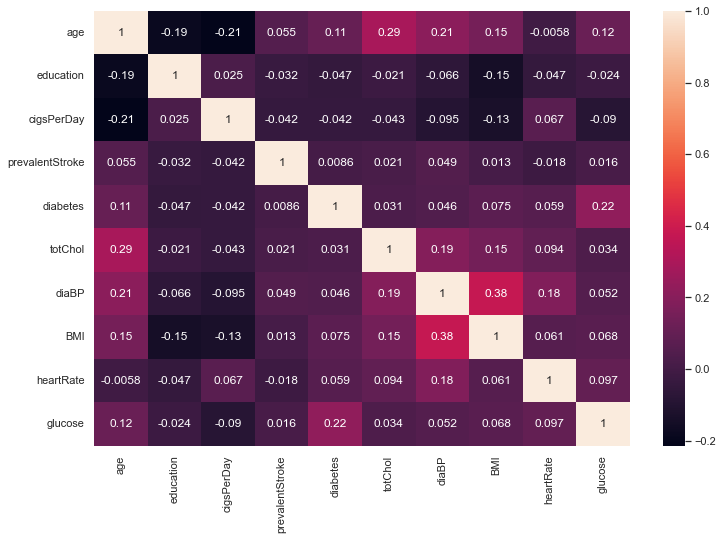

In [14]:
f, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df_corr, annot=True)
plt.show()

### Smoker vs Blood Pressure

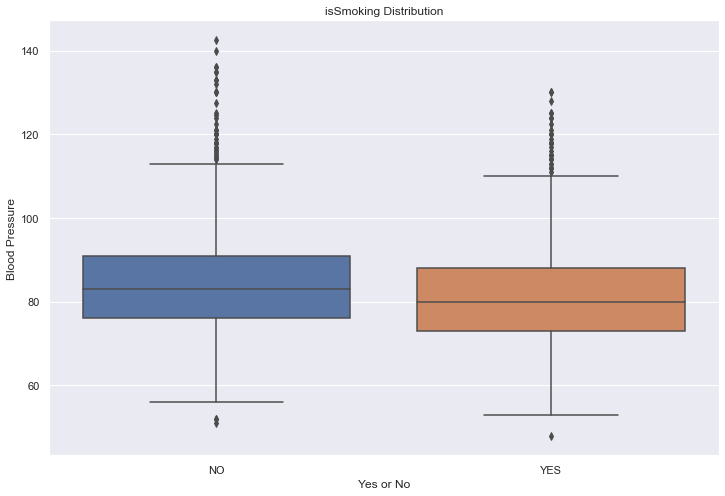

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'is_smoking', y='diaBP', data=df)
plt.title('isSmoking Distribution')
plt.ylabel('Blood Pressure')
plt.xlabel('Yes or No')
plt.show()

median blood pressure for smokers is higher

### Diabetes vs vs Blood Pressure

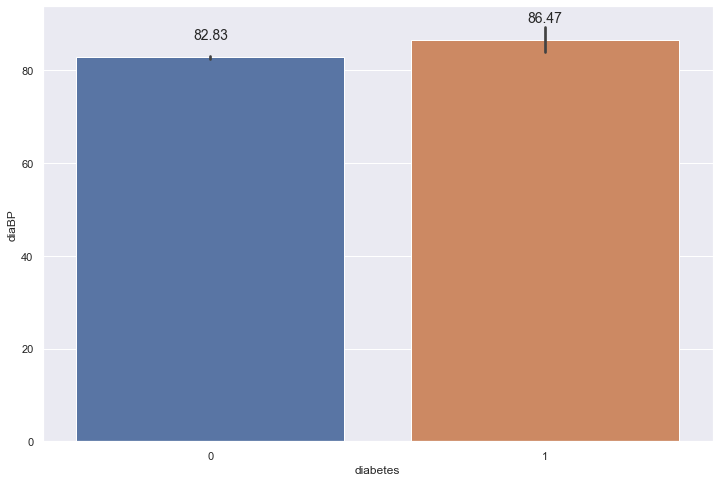

In [16]:
f, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = 'diabetes', y='diaBP', data=df)
#avg Blood pressure  for each bar
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4, round(rect.get_height(),2),
           horizontalalignment='center', fontsize=14)
plt.show()

blood pressure for diabetes is higher

### Stroke vs Blood Pressure

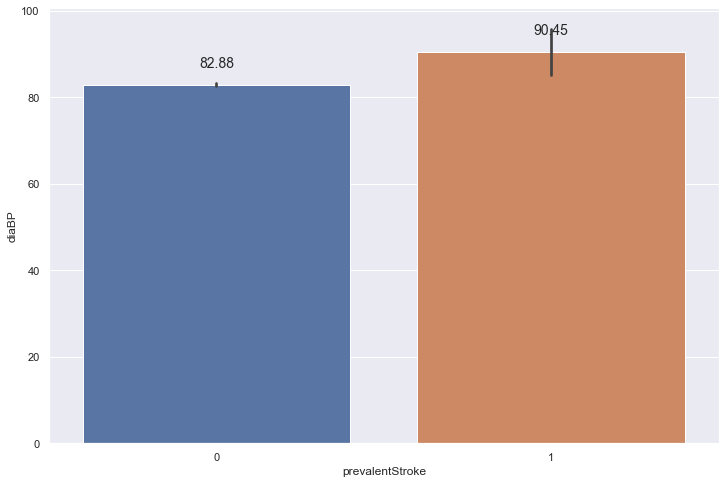

In [17]:
f, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = 'prevalentStroke', y='diaBP', data=df)
#avg Blood pressure  for each bar
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 4, round(rect.get_height(),2),
           horizontalalignment='center', fontsize=14)
plt.show()

blood pressure for prevalentStroke is higher

### Convert categorical to numerical 

In [18]:
from sklearn import preprocessing

In [19]:
label_encoding = preprocessing.LabelEncoder()
df['sex'] = label_encoding.fit_transform(df['sex'].astype(str))
df['is_smoking'] = label_encoding.fit_transform(df['is_smoking'].astype(str))

In [20]:
df.sample(10)

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
2853,43,3.0,0,1,5.0,0,0,214.0,84.0,24.68,80.0,74.0
3553,61,1.0,0,0,0.0,0,0,220.0,93.0,23.37,80.0,79.0
3351,57,4.0,1,0,0.0,0,0,235.0,78.0,28.53,60.0,74.0
2822,50,1.0,0,0,0.0,0,0,189.0,88.0,39.08,60.0,87.0
1659,39,2.0,0,0,0.0,0,0,252.0,86.0,20.74,75.0,93.0
698,42,1.0,1,0,0.0,0,0,258.0,69.0,26.25,60.0,73.0
1857,47,1.0,0,1,9.0,0,1,214.0,92.0,22.73,72.0,57.0
65,37,4.0,0,1,10.0,0,0,156.0,87.0,21.80,66.0,89.0
3232,50,1.0,0,0,0.0,0,1,260.0,130.0,43.67,85.0,260.0
894,53,1.0,1,1,30.0,0,0,244.0,67.5,21.84,88.0,65.0


### Convert to integer

In [21]:
df['cigsPerDay'] = df['cigsPerDay'].astype(int)
df['education'] = df['education'].astype(int)

In [22]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
1,36,4,1,0,0,0,0,212.0,98.0,29.77,72.0,75.0
2,46,1,0,1,10,0,0,250.0,71.0,20.35,88.0,94.0
3,50,1,1,1,20,0,0,233.0,88.0,28.26,68.0,94.0
4,64,1,0,1,30,0,0,241.0,85.0,26.42,70.0,77.0
5,61,3,0,0,0,0,0,272.0,121.0,32.80,85.0,65.0


### Save data for model

In [23]:
df.to_csv('../data/prepared_data.csv', index=False)

____

## Machine Learning for Diastolic Blood Pressure

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [25]:
df = pd.read_csv('../data/prepared_data.csv')

In [26]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,prevalentStroke,diabetes,totChol,diaBP,BMI,heartRate,glucose
0,36,4,1,0,0,0,0,212.0,98.0,29.77,72.0,75.0
1,46,1,0,1,10,0,0,250.0,71.0,20.35,88.0,94.0
2,50,1,1,1,20,0,0,233.0,88.0,28.26,68.0,94.0
3,64,1,0,1,30,0,0,241.0,85.0,26.42,70.0,77.0
4,61,3,0,0,0,0,0,272.0,121.0,32.80,85.0,65.0


### Define Inputs & outputs

In [27]:
X = df.drop(['diaBP'], axis=1)
y = df['diaBP']

### Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=33)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2594, 11), (1113, 11), (2594,), (1113,))

In [30]:
X_train_numerical = X_train[['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']]
X_test_numerical = X_test[['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']]

In [31]:
X_train_categorical = X_train[['education', 'sex', 'is_smoking', 'prevalentStroke', 'diabetes']]
X_test_categorical = X_test[['education', 'sex', 'is_smoking', 'prevalentStroke', 'diabetes']]

### Standard Scaler

In [32]:
scaler = StandardScaler()
X_train_numerical = pd.DataFrame(scaler.fit_transform(X_train_numerical), columns=X_train_numerical.columns)
X_test_numerical =  pd.DataFrame(scaler.fit_transform(X_test_numerical), columns=X_test_numerical.columns)

In [33]:
X_train_numerical.describe()

,age,cigsPerDay,totChol,BMI,heartRate,glucose
count,2.594000e+03,2.594000e+03,2.594000e+03,2.594000e+03,2.594000e+03,2.594000e+03
mean,5.403456e-16,1.081975e-16,4.718394e-17,1.105686e-15,-1.669187e-16,4.583843e-17
std,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00,1.000193e+00
min,-1.948485e+00,-7.534824e-01,-2.798709e+00,-2.517784e+00,-2.663721e+00,-1.807055e+00
25%,-8.993042e-01,-7.534824e-01,-7.063255e-01,-6.627806e-01,-6.543350e-01,-4.656674e-01
50%,-8.327474e-02,-7.534824e-01,-7.636045e-02,-1.019083e-01,-6.826412e-02,-1.627734e-01
75%,8.493304e-01,9.356100e-01,6.379749e-01,5.426948e-01,5.806001e-01,2.266617e-01
max,2.364814e+00,5.158341e+00,8.158183e+00,7.643179e+00,5.624996e+00,1.351073e+01


In [34]:
X_test_numerical.describe()

,age,cigsPerDay,totChol,BMI,heartRate,glucose
count,1.113000e+03,1.113000e+03,1.113000e+03,1.113000e+03,1.113000e+03,1.113000e+03
mean,-4.307226e-16,4.041890e-16,3.039398e-16,6.384032e-17,9.101734e-16,1.423440e-16
std,1.000450e+00,1.000450e+00,1.000450e+00,1.000450e+00,1.000450e+00,1.000450e+00
min,-2.026223e+00,-7.611086e-01,-2.560299e+00,-2.260004e+00,-2.554420e+00,-1.539616e+00
25%,-8.591236e-01,-7.611086e-01,-6.823144e-01,-6.735143e-01,-6.312236e-01,-4.370954e-01
50%,-1.588639e-01,-7.611086e-01,-6.395347e-02,-9.571856e-02,-4.590307e-02,-1.614653e-01
75%,7.748156e-01,8.901855e-01,5.544074e-01,5.702155e-01,5.394175e-01,1.535406e-01
max,2.175335e+00,4.192774e+00,5.226468e+00,4.624579e+00,4.553044e+00,1.228127e+01


In [35]:
X_train_categorical.reset_index(drop=True, inplace=True)
X_train_numerical.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train_categorical, X_train_numerical], axis=1)

In [36]:
X_train.head()

,education,sex,is_smoking,prevalentStroke,diabetes,age,cigsPerDay,totChol,BMI,heartRate,glucose
0,4,1,1,0,0,0.383028,-0.331209,-0.121358,-0.156087,-1.826477,-0.292585
1,2,0,0,0,0,0.149877,-0.753482,2.443500,-0.116684,2.192295,-0.119503
2,2,0,1,0,0,-1.015880,0.091064,-1.538779,-1.473614,-1.324130,-0.335856
3,1,0,0,0,0,-0.899304,-0.753482,0.081131,1.624421,1.606224,-0.292585
4,2,0,0,0,0,1.199057,-0.753482,2.173515,-0.094520,0.350358,0.702638


In [37]:
X_test_categorical.reset_index(drop=True, inplace=True)
X_test_numerical.reset_index(drop=True, inplace=True)
X_test = pd.concat([X_test_categorical, X_test_numerical], axis=1)

In [38]:
X_test.head()

,education,sex,is_smoking,prevalentStroke,diabetes,age,cigsPerDay,totChol,BMI,heartRate,glucose
0,4,1,0,0,0,-0.508994,-0.761109,-0.338781,-0.458065,-1.969099,0.035413
1,4,0,1,0,0,0.074556,1.715833,-0.499096,-0.893860,-0.631224,-0.437095
2,1,1,1,0,0,1.124945,0.890186,-1.667111,1.287564,-0.463989,-0.476471
3,2,1,1,0,0,1.591785,-0.265720,-0.430390,0.021799,-0.045903,-0.318968
4,1,1,1,0,0,-0.859124,0.890186,-1.048750,-0.396858,1.375590,-0.200841


### Def for Models & Metrics

In [39]:
def build_model(regressor, X_train, X_test, y_train, y_test):
    model = regressor.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    result_dict = {'training score': train_score, 'test score': test_score}
    return result_dict

In [40]:
def performance_metrics_report():
    for key in report_log:
        print('-' * 50)
        print('Regression model -', key)
        print('-' * 50)
        print()
        for score in report_log[key]:
            print(score, report_log[key][score])

In [41]:
report_log = dict()

## Models

### Linear Regression()

In [42]:
report_log['Linear Regression'] = build_model(LinearRegression(), X_train, X_test, y_train, y_test)

### KNeighbors()

In [43]:
report_log['KNeighbors'] = build_model(KNeighborsRegressor(), X_train, X_test, y_train, y_test)

### SVR()

In [44]:
report_log['SVR'] = build_model(SVR(), X_train, X_test, y_train, y_test)

### Random Forests()

In [45]:
report_log['Random Forests'] = build_model(RandomForestRegressor(), X_train, X_test, y_train, y_test)

## Performance Report

In [46]:
performance_metrics_report()

--------------------------------------------------
Regression model - Linear Regression
--------------------------------------------------

training score 0.20334399983370843
test score 0.2169417479803919
--------------------------------------------------
Regression model - KNeighbors
--------------------------------------------------

training score 0.3622127964880274
test score 0.0783165263321749
--------------------------------------------------
Regression model - SVR
--------------------------------------------------

training score 0.19570017319114552
test score 0.19967360191518413
--------------------------------------------------
Regression model - Random Forests
--------------------------------------------------

training score 0.8826055678497708
test score 0.1577597304033137
